Fetching 1mo of data for NVDA...


/var/folders/3n/c2cyvjmd52585bcd83mjw9dw0000gp/T/ipykernel_25858/1023013280.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, period=DATA_PERIOD, interval="1d")
[*********************100%***********************]  1 of 1 completed

Calculated 10-day Moving Average.
Calculated 22-day Moving Average.
Calculated 66-day Moving Average.

Latest data with Moving Averages:
Price            Close        High         Low        Open     Volume  \
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA   
Date                                                                    
2025-07-29  175.509995  179.380005  175.020004  177.960007  154077500   
2025-07-30  179.270004  179.889999  176.039993  176.509995  174312200   
2025-07-31  177.869995  183.300003  175.929993  182.899994  221685400   
2025-08-01  173.720001  176.539993  170.889999  174.089996  204529000   
2025-08-04  180.000000  180.199997  174.520004  175.160004  147674000   

Price            MA_10 MA_22 MA_66  
Ticker                              
Date                                
2025-07-29  172.547000   NaN   NaN  
2025-07-30  173.337001   NaN   NaN  
2025-07-31  173.824001   NaN   NaN  
2025-08-01  173.955000   NaN   NaN  
2025-08-04  174.817

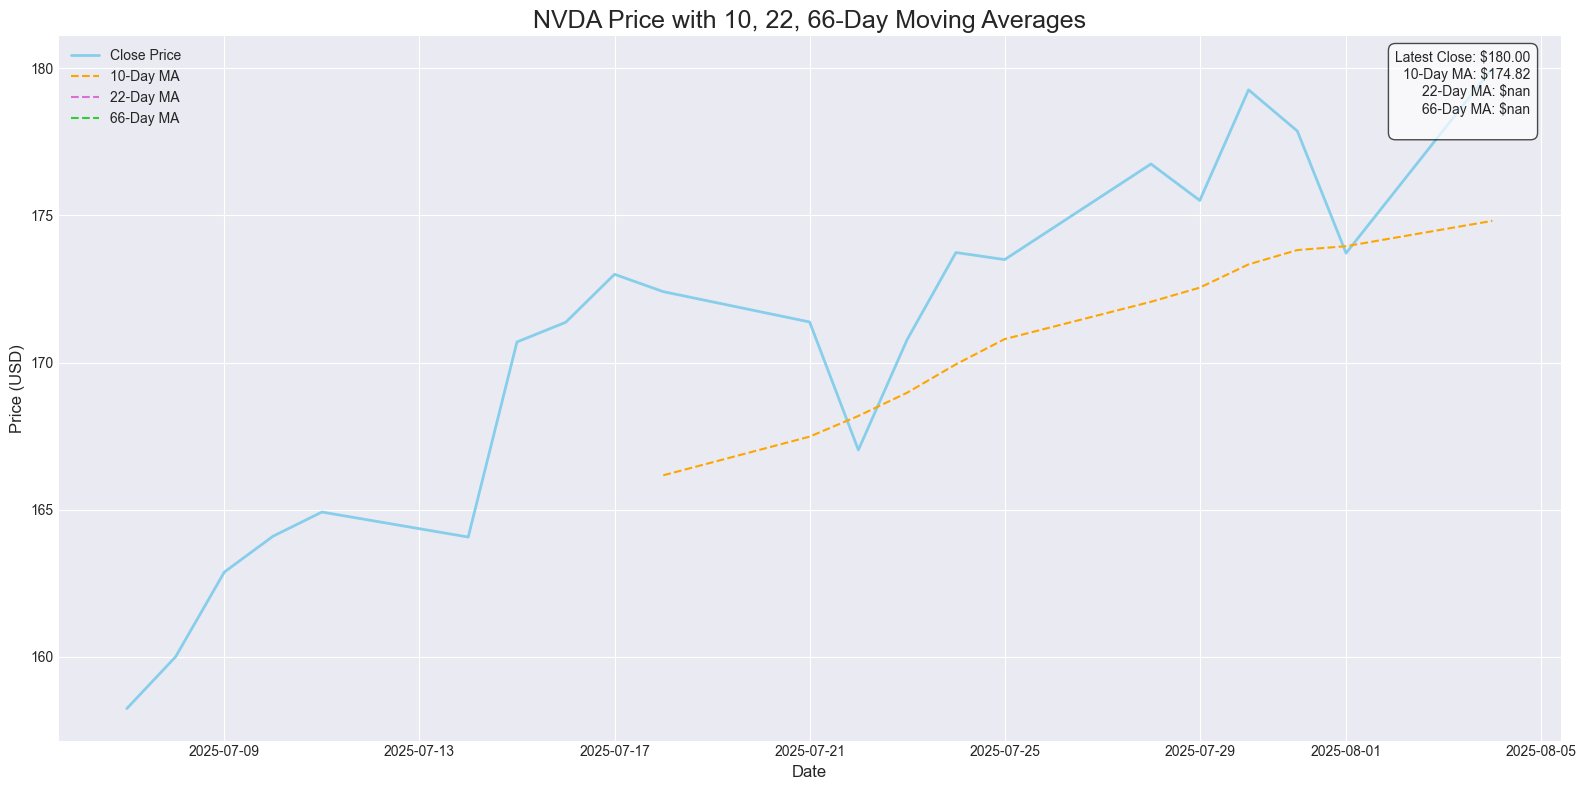

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. CONFIGURATION ---
# Adjust these parameters to play around with the analysis

TICKER = "NVDA"
DATA_PERIOD = "1mo"  # Timeframe to fetch (e.g., "6mo", "1y", "2y", "max")
MA_WINDOWS = [10, 22, 66] # The moving average windows you want to plot

# --- 2. DATA FETCHING ---
print(f"Fetching {DATA_PERIOD} of data for {TICKER}...")
data = yf.download(TICKER, period=DATA_PERIOD, interval="1d")

if data.empty:
    print(f"No data found for {TICKER}. Please check the ticker symbol or data period.")
else:
    # --- 3. CALCULATE MOVING AVERAGES ---
    # This loop automatically creates a new column for each window in MA_WINDOWS
    for window in MA_WINDOWS:
        column_name = f"MA_{window}"
        data[column_name] = data['Close'].rolling(window=window).mean()
        print(f"Calculated {window}-day Moving Average.")

    # Display the last 5 rows to check the calculations
    print("\nLatest data with Moving Averages:")
    print(data.tail())


if isinstance(data.columns, pd.MultiIndex):
        # Option A – drop the outer level (works when only one ticker):
    data = data.droplevel(1, axis=1)


    # --- 4. VISUALIZATION ---
    print("\nGenerating plot...")
    
    # Use a style for better aesthetics
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # Create a figure and axes for the plot
    fig, ax = plt.subplots(figsize=(16, 8))

    # Plot the Close price
    ax.plot(data.index, data['Close'], label='Close Price', color='skyblue', linewidth=2)

    # Define colors for the MA lines for better distinction
    ma_colors = ['orange', 'orchid', 'limegreen']

    # Plot each moving average
    for i, window in enumerate(MA_WINDOWS):
        ax.plot(data.index, data[f'MA_{window}'], 
                label=f'{window}-Day MA', 
                color=ma_colors[i % len(ma_colors)], # Cycle through colors if more MAs are added
                linestyle='--', 
                linewidth=1.5)

    # --- 5. ENHANCE THE PLOT FOR TRADING DECISIONS ---

    # Set Title and Labels
    ax.set_title(f'{TICKER} Price with {", ".join(map(str, MA_WINDOWS))}-Day Moving Averages', fontsize=18)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price (USD)', fontsize=12)

    # Add a legend to identify the lines
    ax.legend(loc='upper left', fontsize=10)

    # Get the latest data point for the info box
    latest_data = data.iloc[-1]
    
    # Create the text for the info box
    info_text = f"Latest Close: ${latest_data['Close']:.2f}\n"
    for window in MA_WINDOWS:
        info_text += f"{window}-Day MA: ${latest_data[f'MA_{window}']:.2f}\n"
        
    # Add the info box to the top right of the chart
    ax.text(0.98, 0.98, info_text, 
            transform=ax.transAxes, 
            fontsize=10,
            verticalalignment='top', 
            horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

    # Show the plot
    plt.tight_layout() # Adjusts plot to prevent labels from overlapping
    plt.show()